<a href="https://colab.research.google.com/github/BandaAkshitha/Natural-Language-Processing/blob/main/NLP_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-3242469506.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(clean_tweet)


Cleaned Tweet Corpus (Sample):
0                                                 said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: cleaned_text, dtype: object 

Top TF-IDF Terms for Negative Sentiment:

         Term  TF-IDF Score
6      flight      0.161364
8         get      0.068515
2   cancelled      0.053937
16    service      0.052331
18       time      0.044687
12      hours      0.044553
9        help      0.043687
13         im      0.042881
4    customer      0.042700
10       hold      0.040962
15      plane      0.039804
19         us      0.038649
17      still      0.037706
5     delayed      0.037145
3        cant      0.036345
14        one      0.034583
0         amp      0.034461
11       hour      0.033592
1        call      0.032677
7   flightled      0.027828


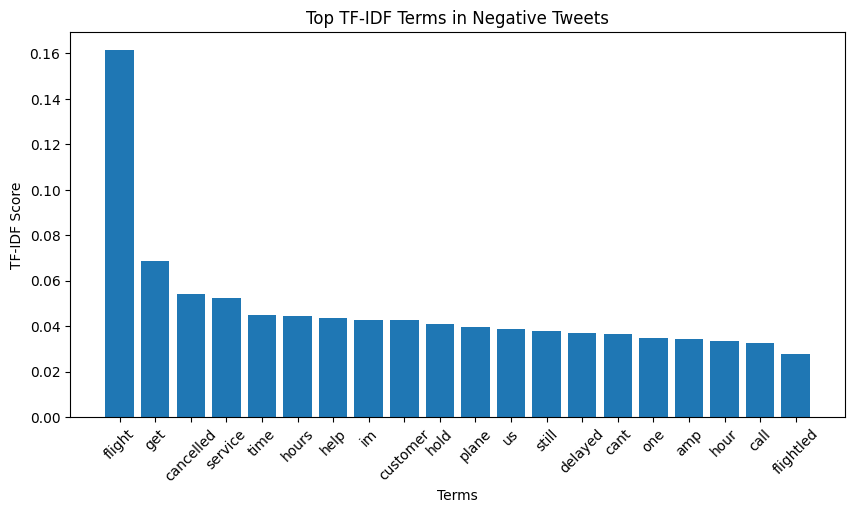

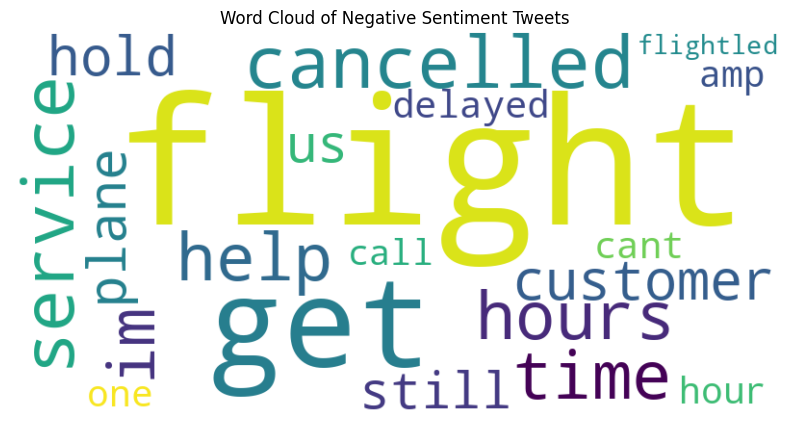

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("/content/Tweets.csv")
data = df[['text', 'airline_sentiment']]


stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['cleaned_text'] = data['text'].apply(clean_tweet)

print("Cleaned Tweet Corpus (Sample):")
print(data['cleaned_text'].head(), "\n")


negative_corpus = data[data['airline_sentiment'] == 'negative']['cleaned_text']


vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(negative_corpus)

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).A1

tfidf_df = pd.DataFrame({
    'Term': feature_names,
    'TF-IDF Score': tfidf_scores
}).sort_values(by='TF-IDF Score', ascending=False)

print("Top TF-IDF Terms for Negative Sentiment:\n")
print(tfidf_df)


plt.figure(figsize=(10,5))
plt.bar(tfidf_df['Term'], tfidf_df['TF-IDF Score'])
plt.xticks(rotation=45)
plt.title("Top TF-IDF Terms in Negative Tweets")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(
    dict(zip(tfidf_df['Term'], tfidf_df['TF-IDF Score']))
)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Sentiment Tweets")
plt.show()
